In [1]:
import os 
import random
from dotenv import load_dotenv
!pip install transformers
from huggingface_hub import login 
!pip install datasets
from datasets import load_dataset, Dataset, DatasetDict
from items import Item
from loader import ItemLoader
import matplotlib.pyplot as plt
!pip install collections
from collections import Counter, defaultdict
import numpy as np 
import pickle



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.12 -m pip install --upgrade pip


/usr/local/lib/python3.12/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.12 -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement collections (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.12 -m pip install --upgrade pip
ERROR: No matching distribution found for collections


In [3]:
!git config --global credential.helper store

#environment
load_dotenv("hg_token.env")
huggingface_token = os.getenv("HUGGINGFACE_TOKEN")
login(token=huggingface_token, add_to_git_credential=True)


# The ItemLoader Code

In [3]:
#look in loaders.py there is some code that makes life easier for us
#load in the same dataset as last time
items = ItemLoader("Appliances").load()

Loading dataset Appliances


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [00:07<00:00, 13.12it/s]

Completed Appliances with 28,625 datapoints in 0.1 mins


In [5]:
print(items[0].prompt)

How much does this cost to the nearest dollar?

Rack Roller and stud assembly Kit (4 Pack) by AMI PARTS Replaces
PARTS NUMBER The dishwasher top rack wheels and stud assembly Kit （4 pcs） SCOPE OF APPLICATION The dishwasher works with most top name brands,If you are not sure if part is correct, ask us in Customer questions & answers section or visiting the AMI PARTS storefront.We’re happy to help ensure you select the correct part for your Rack Roller and stud REPLACES PART FIXES SYMPTOMS Door won’t close | Not cleaning dishes properly | Noisy | Door latch failure QUALITY WARRANTY The replacement part is made from durable high quality material and well-tested by manufacturer.For any reason you’re not satisfied,you can ask for a replacement or full refund Brand Name AMI PARTS, Model

Price is $9.00


In [5]:
#now we want to have all items in home retail store , electrical, electronics, office and related but not clothes/ book / beauty

dataset_names = [
    
    "Automotive",
    "Electronics",
    "Office_Products",
    "Tools_and_Home_Improvement",
    "Cell_Phones_and_Accessories", 
    "Toys_and_Games",
    "Appliances",
    "Musical_Instruments",
]
   

In [6]:
items = []


for dataset_name in dataset_names:
    loader = ItemLoader(dataset_name)
    items.extend(loader.load(workers=10))

    
    

Loading dataset Automotive


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2004/2004 [03:21<00:00,  9.93it/s]

Completed Automotive with 911,688 datapoints in 3.6 mins
Loading dataset Electronics



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1611/1611 [01:57<00:00, 13.67it/s]


Completed Electronics with 443,473 datapoints in 2.1 mins
Loading dataset Office_Products


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 711/711 [00:54<00:00, 12.98it/s]


Completed Office_Products with 240,394 datapoints in 1.0 mins
Loading dataset Tools_and_Home_Improvement


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1474/1474 [02:07<00:00, 11.61it/s]


Completed Tools_and_Home_Improvement with 541,051 datapoints in 2.3 mins
Loading dataset Cell_Phones_and_Accessories


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1289/1289 [01:14<00:00, 17.41it/s]


Completed Cell_Phones_and_Accessories with 238,869 datapoints in 1.4 mins
Loading dataset Toys_and_Games


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 891/891 [01:15<00:00, 11.80it/s]


Completed Toys_and_Games with 340,479 datapoints in 1.4 mins
Loading dataset Appliances


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [00:07<00:00, 13.47it/s]


Completed Appliances with 28,625 datapoints in 0.2 mins
Loading dataset Musical_Instruments


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 214/214 [00:15<00:00, 13.68it/s]


Completed Musical_Instruments with 66,829 datapoints in 0.3 mins


In [7]:
print(f"A grand total of {len(items):,} items")

A grand total of 2,811,408 items


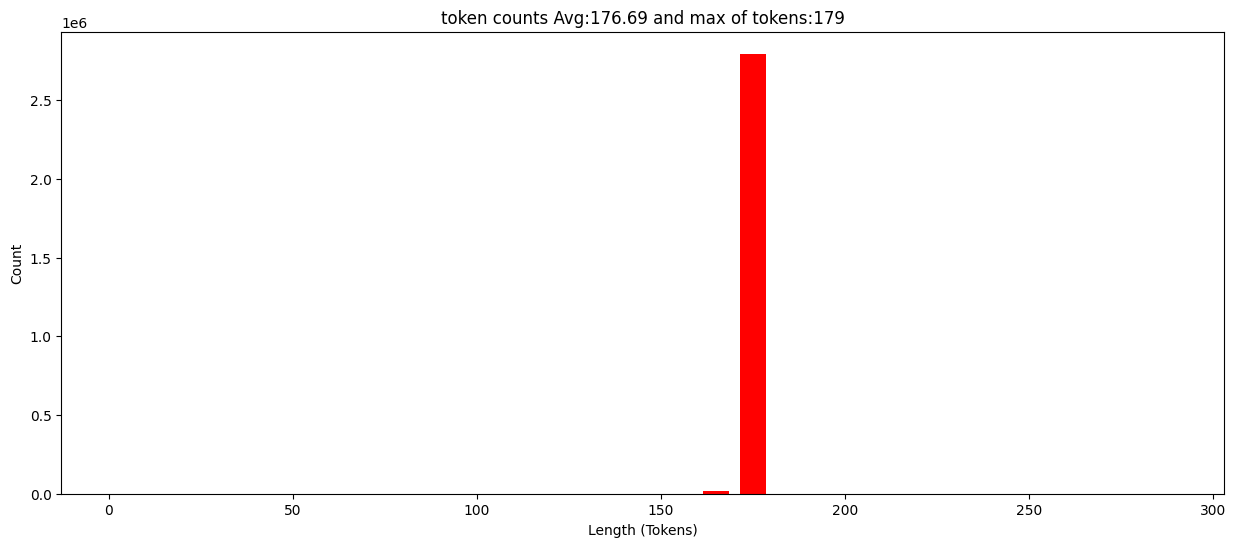

In [9]:
#plot the distribution of token counts again

tokens = [item.token_count for item in items]
plt.figure(figsize=(15, 6))
plt.hist(tokens, rwidth=0.7, color='red', bins=range(0, 300, 10))
plt.title(f"token counts Avg:{sum(tokens) / len(tokens):,.2f} and max of tokens:{max(tokens):,}")
plt.xlabel('Length (Tokens)')
plt.ylabel('Count')
plt.show()

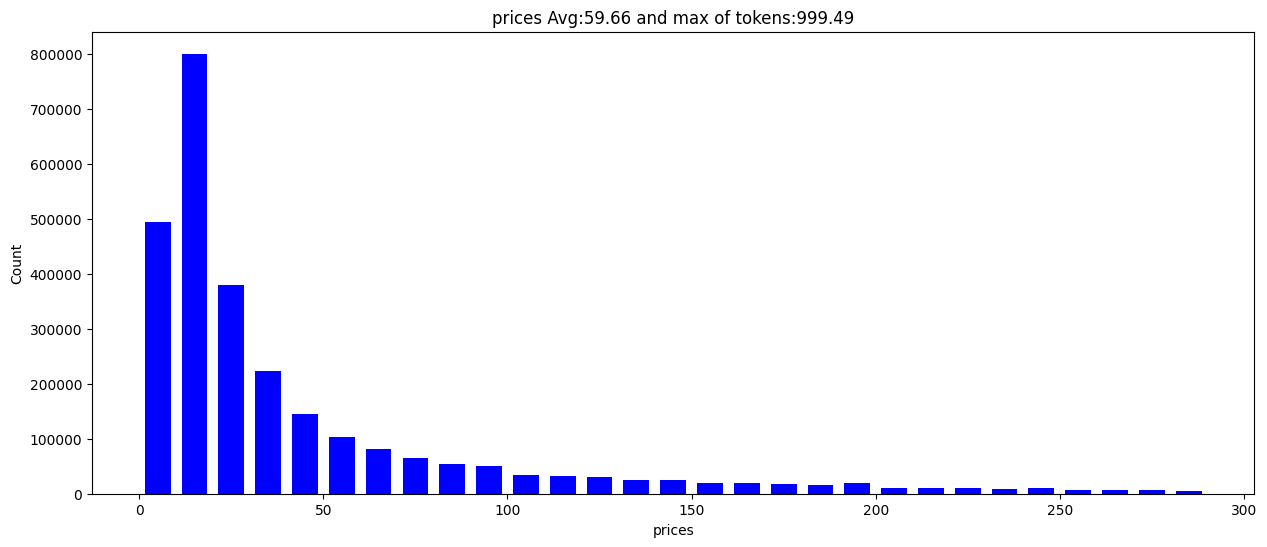

In [12]:
#plot the distribution of prices
prices = [item.price for item in items]
plt.figure(figsize=(15, 6))
plt.hist(prices, rwidth=0.7, color='blue', bins=range(0, 300, 10))
plt.title(f"prices Avg:{sum(prices) / len(prices):,.2f} and max of tokens:{max(prices):,}")
plt.xlabel('prices')
plt.ylabel('Count')
plt.show()

In [26]:
#bar chart of all categories to compare with each other
from collections import Counter

categories = set([item.category for item in items])
print(type(categories))


<class 'set'>


In [28]:
print(len(items))

2811408


In [45]:
#first we want to calculate category count
category_counts = Counter()
for item in items:
   category_counts[item.category]+=1
categories = category_counts.keys()
print(category_counts)
# print(categories)
# print(counts)



Counter({'Automotive': 911688, 'Tools_and_Home_Improvement': 541051, 'Electronics': 443473, 'Toys_and_Games': 340479, 'Office_Products': 240394, 'Cell_Phones_and_Accessories': 238869, 'Musical_Instruments': 66829, 'Appliances': 28625})


In [43]:
#another way of calculating counts of each category

counts = {}
for item in items:
    if item.category in counts:
        counts[item.category] +=1
    else:
        counts[item.category] = 1
print(counts)
        
    

{'Automotive': 911688, 'Electronics': 443473, 'Office_Products': 240394, 'Tools_and_Home_Improvement': 541051, 'Cell_Phones_and_Accessories': 238869, 'Toys_and_Games': 340479, 'Appliances': 28625, 'Musical_Instruments': 66829}


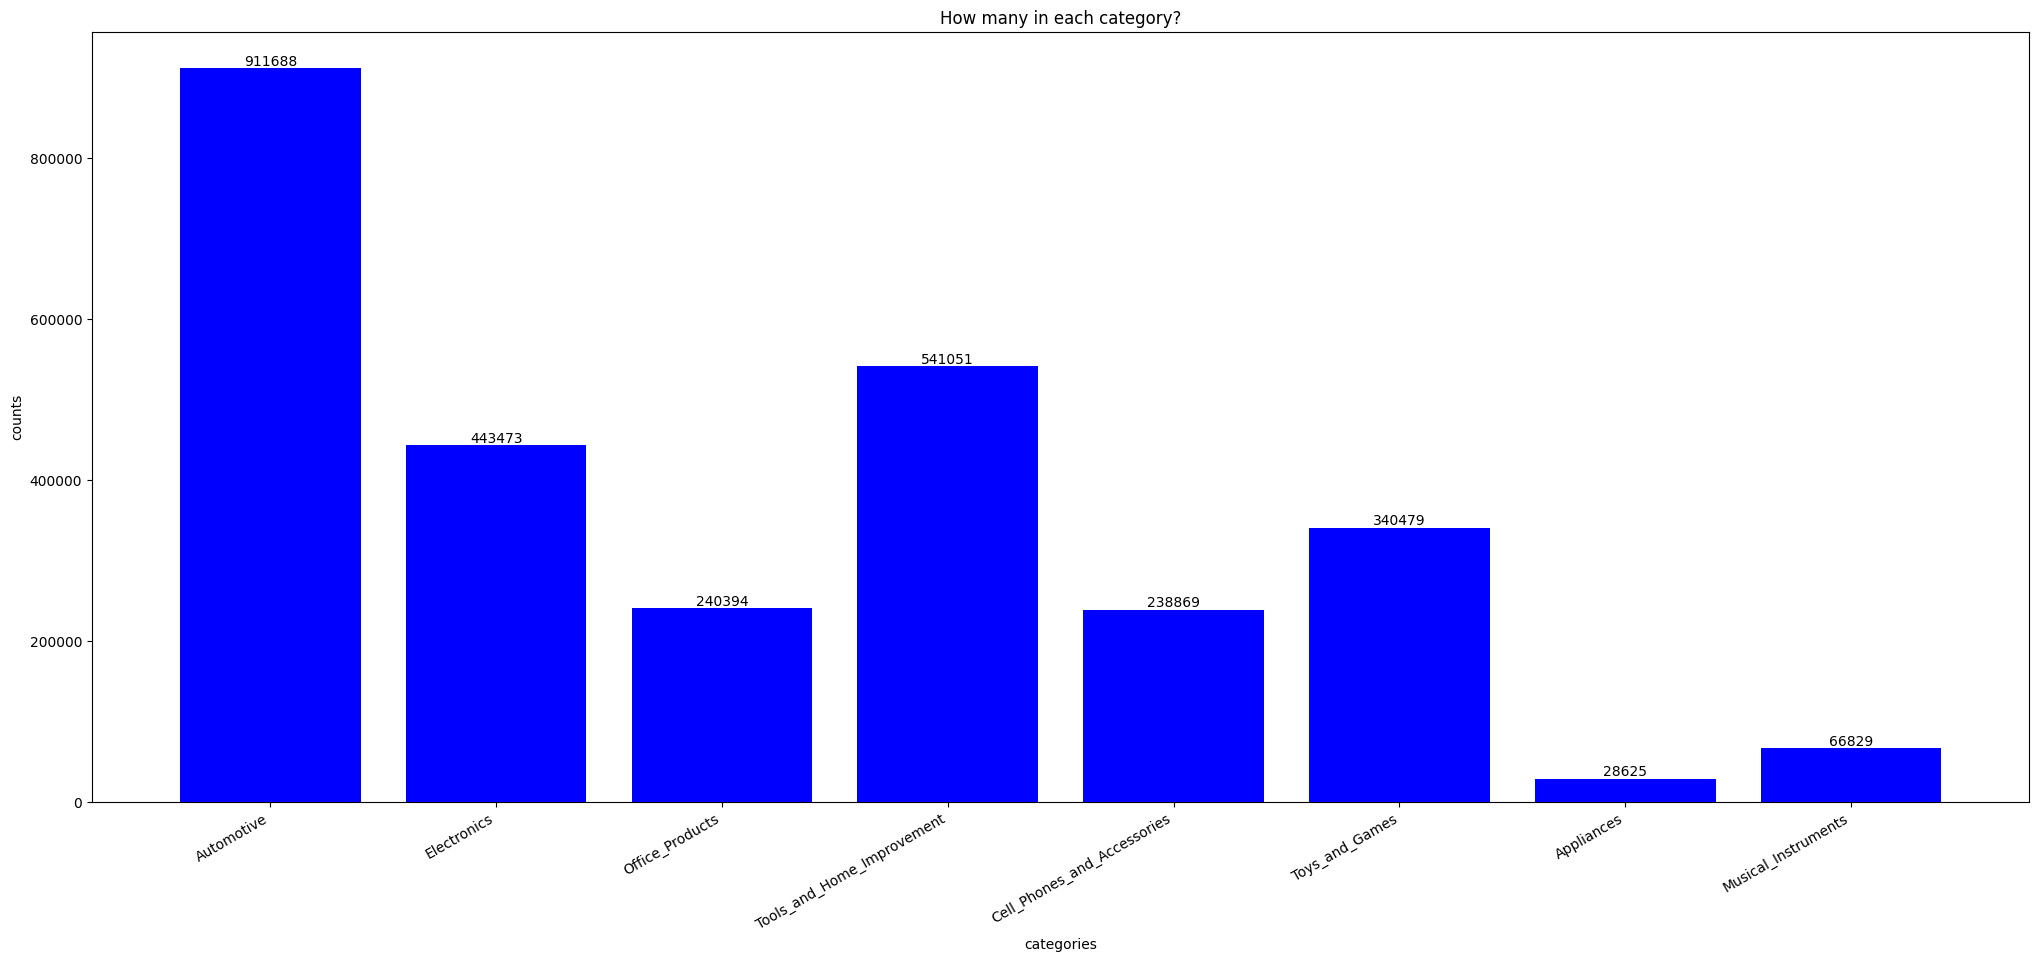

In [35]:
counts = [category_counts[category] for category in categories]
plt.figure(figsize=(25, 10))
plt.bar(categories, counts , color='blue')
plt.title("How many in each category?")
plt.xlabel("categories")
plt.ylabel("counts")
plt.xticks(rotation=30, ha="right")

#add value and label on top of each bar
for i, v in enumerate(counts):
    plt.text(i, v, f"{v}", ha="center", va="bottom")
    
plt.show()

In [ ]:
 #we want to craft our dataset which is more balanced in terms of proces from 1$ to 999$
# less heavily skewed into cheap items, with the  average that is higher than 60$
#try to balance out the categories
#fewer automotive items.

## Objective

In [56]:
#create a dictionary with the key of from 1$ to 999$
# and in the value put the items which have that price (to nearest round number)
slots = defaultdict(list)
for item in items:
    slots[round(item.price)].append(item)
# print(len(slots))
print(type(slots))


<class 'collections.defaultdict'>


In [61]:
#create a dataset called sample which tries to more evenly take from range of prices
# and gives more weights to items from categories other than Automotive
# set random seed for reproducibility


np.random.seed(42)
random.seed(42)
sample = []
for i in range(1, 1000):
    slot = slots[i]
    if i >= 240:
        sample.extend(slot)
    elif len(slot) <=1200:
        sample.extend(slot)
    else:
        weights = np.array([1 if item.category == "Automotive" else 5 for item  in slot])
        weights = weights / np.sum(weights)
        selected_indices = np.random.choice(len(slot), size=1200, p =weights)
        selected = [slot[i] for i in selected_indices] 
        sample.extend(selected)


print(f"There are {len(sample):,} items in the sample")
print(sample[1])


There are 408,635 items in the sample
<Shaddoll Squamata - SDSH-EN006 - Common - 1st Edition = $1.1>


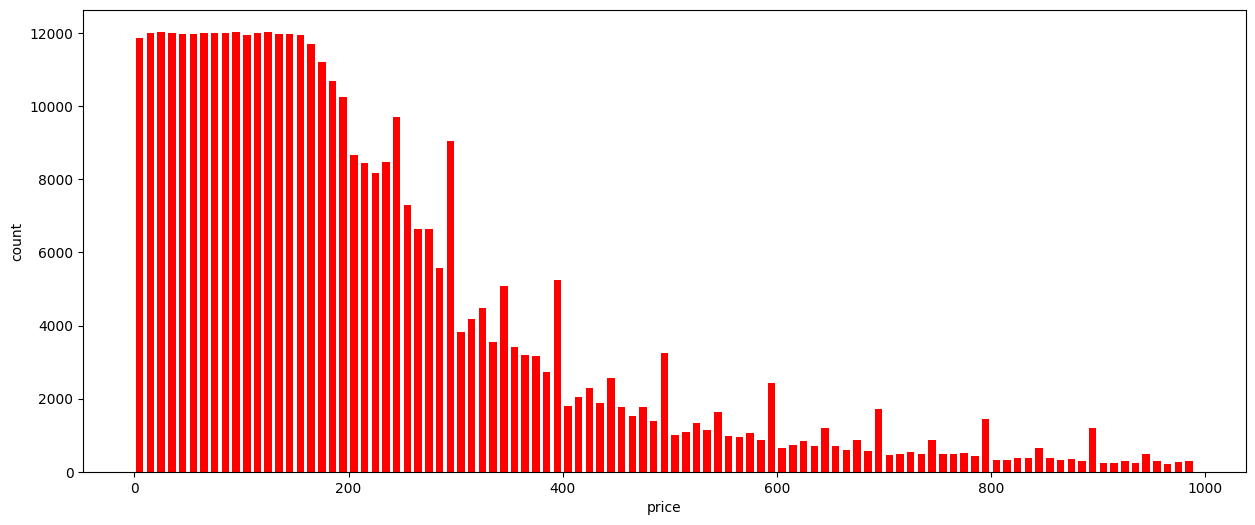

In [64]:
#plot the distribution of prices in sample
prices = [float(item.price) for item in sample  ]  
plt.figure(figsize=(15, 6))
plt.hist(prices,rwidth=0.7, color='red', bins=range(0, 1000, 10))
plt.xlabel("price")
plt.ylabel("count")
plt.show()

In [68]:
#lets see the categories
sample[0].category

'Toys_and_Games'

In [ ]:
#howmany in each category

